# 일반 뉴스 기사 샘플링

In [1]:
import pandas
import os
from kobart import get_pytorch_kobart_model, get_kobart_tokenizer
from tqdm import tqdm

tokenizer = get_kobart_tokenizer()

root_path = os.path.join('./Dataset/train',str(0))
root_file_list = [f for f in os.listdir(root_path)]

len_list = []
save_filename_list = []

for file_name in tqdm(root_file_list):
    file_path = os.path.join(root_path,file_name)
    with open(file_path, 'r') as file:
        title = file.readline().rstrip('\n')
        content = file.readline()

        tokens = (
            [tokenizer.bos_token]
            + tokenizer.tokenize(title)
            + ['<unused0>'] # <unused0>
            + tokenizer.tokenize(content)
            + [tokenizer.eos_token]
        )
        tokens = tokenizer.convert_tokens_to_ids(tokens)

        if len(tokens) <= 2000:
            len_list.append(len(tokens))

        if len(tokens) <= 1026:
            save_filename_list.append(file_name) # 남기기
    

using cached model. c:\Users\minki\Desktop\Bigkinds_news_competition\.cache\kobart_base_tokenizer_cased_cf74400bce.zip


100%|██████████| 22726/22726 [02:24<00:00, 157.00it/s]


(array([  1.,   0.,   4.,   9.,  20.,  22.,  38.,  65.,  81.,  80.,  59.,
        109.,  88., 118., 111., 103., 101.,  82.,  85.,  96., 110., 113.,
        135., 131., 101., 119., 118., 113., 114., 125., 142., 113., 141.,
        137., 121., 112., 115., 106., 127., 125., 125., 133., 100., 127.,
        123., 126., 120., 139., 139., 145., 157., 112., 115., 140., 125.,
        158., 139., 131., 138., 151.,  96., 146., 139., 134., 149., 115.,
        118.,  98., 114., 123.,  96., 130., 108., 112., 102., 131., 134.,
        140.,  91., 117.,  99.,  99., 104., 109.,  78.,  94.,  91., 101.,
        106.,  99.,  90.,  62.,  80.,  88., 100.,  79.,  93.,  92.,  86.,
         74.,  99.,  87.,  79.,  70.,  94.,  82.,  56.,  78.,  71.,  83.,
         83.,  61.,  67.,  51.,  68.,  66.,  65.,  64.,  54.,  55.,  54.,
         64.,  58.,  49.,  42.,  73.,  64.,  59.,  66.,  79.,  44.,  64.,
         45.,  35.,  59.,  49.,  45.,  42.,  46.,  43.,  50.,  49.,  51.,
         64.,  39.,  50.,  43.,  33., 

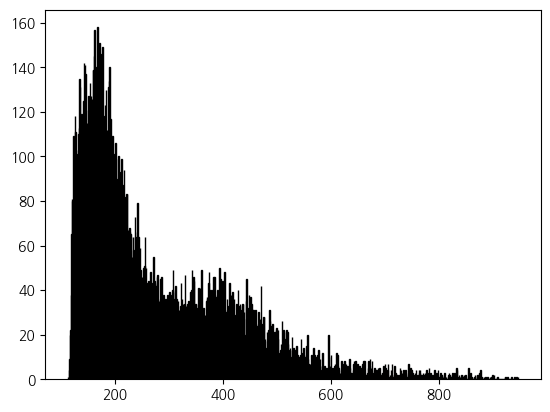

In [2]:
import matplotlib.pyplot as plt

plt.hist(len_list, bins=range(min(len_list), max(len_list) + 1), edgecolor='black')

In [4]:
for file_name in tqdm(root_file_list):
    if file_name not in save_filename_list:
        os.remove(os.path.join(root_path,file_name))

len(save_filename_list) , len([f for f in os.listdir(root_path)])   # 실수 , 둘다 똑같음

100%|██████████| 35428/35428 [00:08<00:00, 3960.59it/s]


(35428, 33151)

#  어린이 뉴스 기사 샘플링

In [6]:
root_path = os.path.join('./Dataset',str(1))
root_file_list = [f for f in os.listdir(root_path)]

len_list = []
save_filename_list = []

for file_name in tqdm(root_file_list):
    file_path = os.path.join(root_path,file_name)
    with open(file_path, 'r') as file:
        title = file.readline().rstrip('\n')
        content = file.readline()

        tokens = (
            [tokenizer.bos_token]
            + tokenizer.tokenize(title)
            + ['<unused0>'] # <unused0>
            + tokenizer.tokenize(content)
            + [tokenizer.eos_token]
        )
        tokens = tokenizer.convert_tokens_to_ids(tokens)

        if len(tokens) <= 2000:
            len_list.append(len(tokens))

        if len(tokens) <= 1026:
            save_filename_list.append(file_name) # 남기기

100%|██████████| 3420/3420 [00:20<00:00, 164.17it/s]


(array([3., 5., 3., ..., 0., 0., 1.]),
 array([   5.,    6.,    7., ..., 1908., 1909., 1910.]),
 <BarContainer object of 1905 artists>)

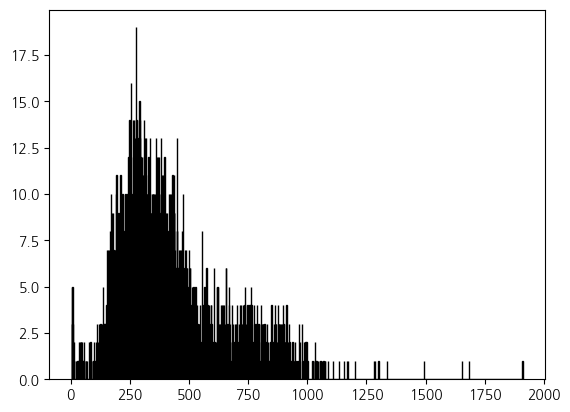

In [7]:
plt.hist(len_list, bins=range(min(len_list), max(len_list) + 1), edgecolor='black')

In [11]:
for file_name in tqdm(root_file_list):
    if file_name not in save_filename_list:
        try:
            os.remove(os.path.join(root_path,file_name))
        except:
            pass

len(save_filename_list) , len([f for f in os.listdir(root_path)])

100%|██████████| 3420/3420 [00:00<00:00, 35871.07it/s]


(3383, 3383)

# train / val / test 나누기

어린이 3383개 , 일반 33151개

train 2700+83 / 27000+151개

val 300 / 3000개

test 300 / 3000개

In [17]:
import random
import shutil

In [26]:
label = 0
mode = 'train'
count = 2700
from_path = os.path.join('./Dataset',str(label))
to_path = os.path.join(f'./Dataset/{mode}',str(label))

from_file = [f for f in os.listdir(from_path)]
random.shuffle(from_file)

for file_name in tqdm(from_file):
    from_file_path = os.path.join(from_path,file_name)
    to_file_path = os.path.join(to_path,file_name)
    shutil.move(from_file_path, to_file_path)

100%|██████████| 151/151 [00:00<00:00, 1698.02it/s]


# train / val / test 1:1로 나누기

In [3]:
import random
import shutil
import os
from tqdm import tqdm

In [7]:
label = 0
mode = 'test'
count = 300
root_path = os.path.join(f'./Dataset/{mode}',str(label))

from_file = [f for f in os.listdir(root_path)]
random.shuffle(from_file)

for file_name in tqdm(from_file[:-count]):
    file_path = os.path.join(root_path,file_name)
    os.remove(file_path)

len([f for f in os.listdir(root_path)])

100%|██████████| 2700/2700 [00:00<00:00, 5557.27it/s]


300

# 기사 본문 기자이름 제거

In [20]:
import random
import shutil
import os
from tqdm import tqdm
import re
from kobart import get_pytorch_kobart_model, get_kobart_tokenizer

In [23]:
label = 0
mode = 'test'
root_path = os.path.join(f'./Dataset/{mode}',str(label))
from_file = [f for f in os.listdir(root_path)]

tokenizer = get_kobart_tokenizer()
cnt1 , cnt2 = 0 , 0

def remove_text_after_word(text, word='YTN'):
    pattern = re.compile(rf'{re.escape(word)}.*')
    result = re.sub(pattern, '', text)
    return result


for file_name in tqdm(from_file):
    file_path = os.path.join(root_path,file_name)

    with open(file_path, 'r') as file:
        title = file.readline().rstrip('\n')
        content = file.readline()

        title = re.sub(r'\[.*?\]','',title)
        content = remove_text_after_word(content)

    title_len = len(tokenizer(title).input_ids)
    content_len = len(tokenizer(content).input_ids)

    if title_len == 0 or content_len <= 100:
        os.remove(file_path)
        cnt1 += 1
    else:
        with open(file_path, 'w') as file:
            file.write(title+'\n'+content)
        cnt2 += 1


print(f'cnt1:{cnt1} cnt2:{cnt2}')
print(len([f for f in os.listdir(root_path)]))


    

using cached model. c:\Users\minki\Desktop\Bigkinds_news_competition\.cache\kobart_base_tokenizer_cased_cf74400bce.zip


  0%|          | 0/3000 [00:00<?, ?it/s]

100%|██████████| 3000/3000 [00:16<00:00, 177.47it/s]

cnt1:482 cnt2:2518
2518
